In [2]:
# Multiple linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('./data/loan_data.csv')

In [11]:
data.head()
# data.drop(columns=["year", "month"], axis=1, inplace=True)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
# check null value
data.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

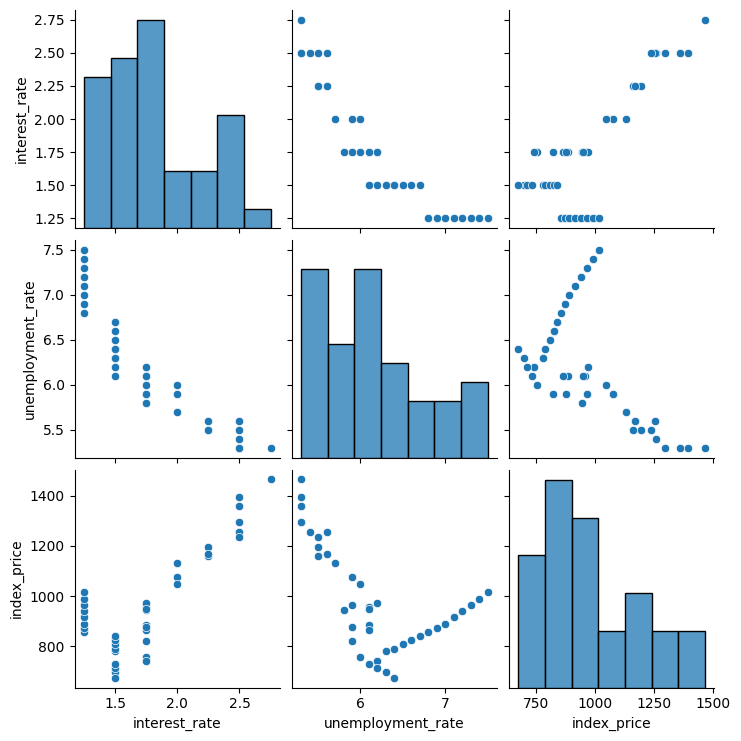

In [15]:
# lets  do some visualization
import seaborn as sns
sns.pairplot(data)
plt.show()

In [16]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.911497,0.822299
unemployment_rate,-0.911497,1.000000,-0.578702
index_price,0.822299,-0.578702,1.000000
